**DS 301: Applied Data Modeling and Predictive Analysis**

# Lab 2 – Classifier

Deepak-George Thomas and Nok Wongpiromsarn, 4 September 2020

## 1. Get and visualize the data to gain insights

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
data_path = os.path.join("datasets", "german_credit_data.csv")
data = pd.read_csv(data_path)

In [3]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


Text(0, 0.5, 'Count')

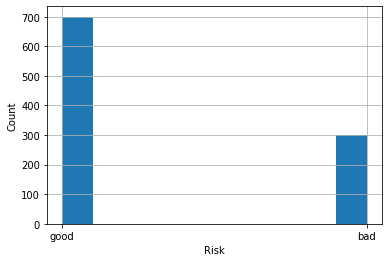

In [4]:
import matplotlib.pyplot as plt
data['Risk'].hist()
plt.xlabel('Risk')
plt.ylabel('Count')

## 2. Separate the data into features (x) and label (y) such that

- y is a binary target, indicating whether risk is "good"
- x contains the following numerical columns: Age, Job, Credit amount, Duration.

In [5]:
attributes = ['Age',
             'Job',
             'Credit amount',
             'Duration']

x = data[attributes]

y = (data['Risk'] == 'good')

## 3. Pick 2 of the following classifiers and train them, using only numeric features.

- Gaussian Naive Bayes
- Decision Tree
- KNN
- LogisticRegression

In [6]:
# Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(x,y)

# Implement another classifier of your choice


GaussianNB()

## 4. Report the following performance measures on both classifiers. [2 points]

- training accuracy
- cross-validation accuracy
- confusion matrix
- precision
- recall
- F1
- AUC

In [7]:
# Training accuracy

from sklearn import metrics
#Naive Bayes
print(metrics.accuracy_score(y, clf_gnb.predict(x)))

# Your second classifier


0.71


In [8]:
# cross-validation accuracy

from sklearn.model_selection import cross_val_score
#Naive Bayes
print(cross_val_score(clf_gnb, x,y, cv = 3, scoring = "accuracy"))

# Your second classifier


[0.70958084 0.6996997  0.6996997 ]


In [9]:
from sklearn.model_selection import cross_val_predict

clf_gnb_pred = cross_val_predict(clf_gnb, x, y ,cv = 3)

# Your second classifier


In [10]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
#Naive Bayes
print(confusion_matrix(y, clf_gnb_pred))

# Your second classifier


[[ 74 226]
 [ 71 629]]


#### Precision Score = TP/(TP + FP)

#### Recall Score  = TP/(TP + FN)

#### F1 Score = Harmonic Mean of Precision and Recall



In [11]:
# Precision, recall and F1

from sklearn.metrics import precision_score, recall_score, f1_score

#Naive Bayes
print("Precision Score:", precision_score(y, clf_gnb_pred))
print("Recall Score: ", recall_score(y, clf_gnb_pred))
print("F1 Score:", f1_score(y, clf_gnb_pred))

# Your second classifier


Precision Score: 0.735672514619883
Recall Score:  0.8985714285714286
F1 Score: 0.8090032154340836


In [12]:
#Naive Bayes
y_gnb_score = cross_val_predict(clf_gnb, x, y ,cv = 3, method = "predict_proba")

# Your second classifier


In [13]:
from sklearn.metrics import roc_auc_score
#Naive Bayes
print(roc_auc_score(y, y_gnb_score[:,1]))

# Your second classifier


0.6200809523809524
